In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, MaxAbsScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
import mylib as my

df = pd.read_csv('diabetes.csv')
print(df.isna().sum()) #No NaN values
print((df == 0).sum()) #Several 0 values, this data is important, fill with the median
#df.shape 768 Rows, 9 Columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [2]:
columns_replace= ['BloodPressure', 'Glucose', 'SkinThickness', 'Insulin', 'BMI'] #These columns should never have 0 (NULL)

for column in columns_replace :
   me= int(df[column].mean(skipna=True))
   df[column] = df[column].replace(0,me)
print((df == 0).sum()) #cleaned up

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


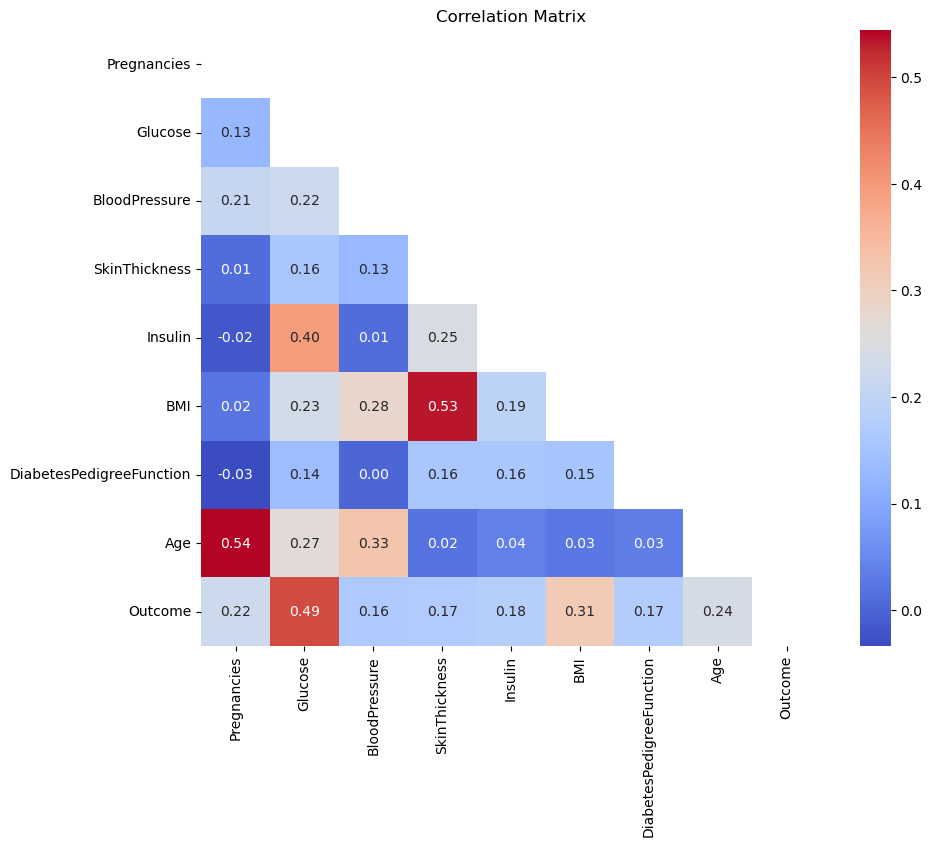

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap of the correlation matrix with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Matrix')
plt.show()

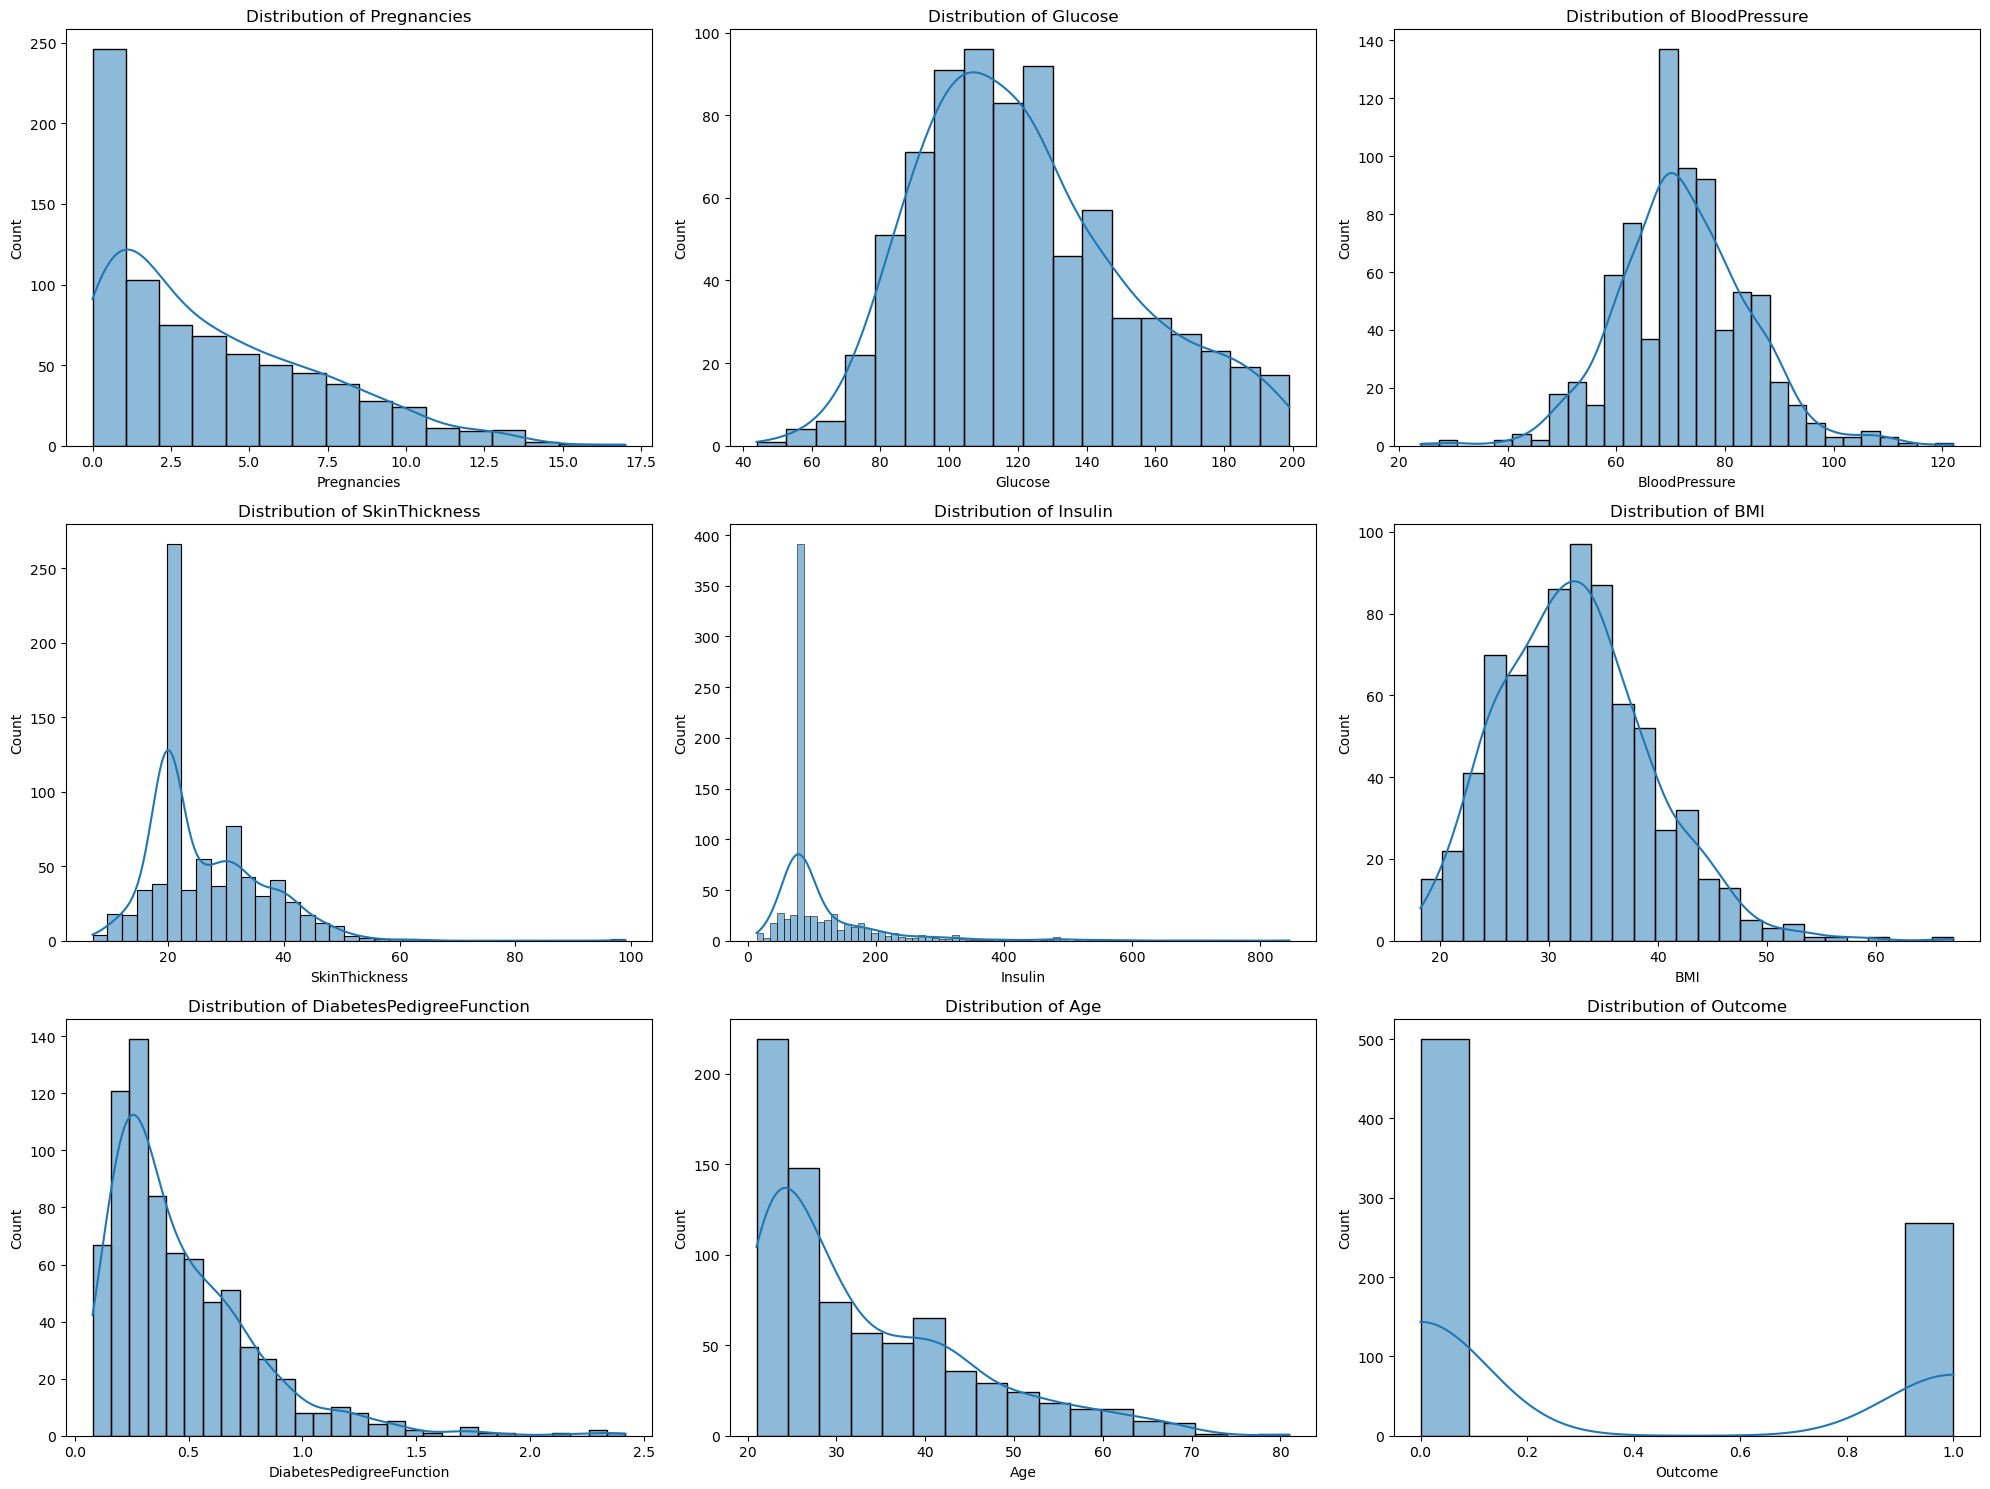

In [4]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

**Feature Vectorization**

In [5]:
###Feature Vectorization
print(df.info()) #All data is already numerical or encoded properly

print(df.describe().T) #Data has varying scales, we need to normalize it
diabetes_df = df.copy()
df = df.drop(columns=['SkinThickness', 'Insulin'])

X, y = df.iloc[:,:-1], df.iloc[:, -1]

# Scale the input features
X_normal = StandardScaler().fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
                          count        mean        std     min       25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.00000   
Glucose                   768.0  121.675781  30.436252  44.000  99.75000   
BloodPr

**Anomaly Detection: Outliers**

In [6]:
### Outlier Check:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination=0.05).fit(X_normal)

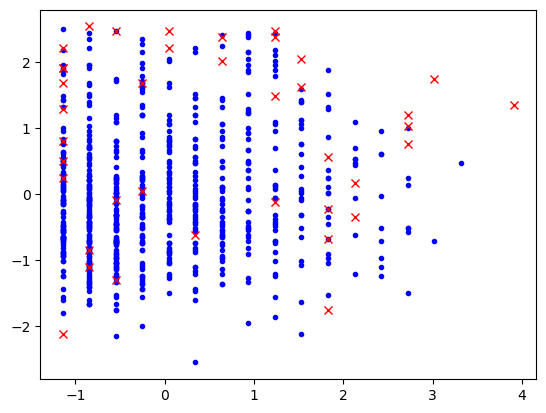

In [7]:
predictions = iforest.predict(X_normal)
# Plot the normal points
plt.plot(X_normal[predictions == 1][:, 0], X_normal[predictions == 1][:, 1], 'b.')

# Plot the anomalous points
plt.plot(X_normal[predictions == -1][:, 0], X_normal[predictions == -1][:, 1], 'rx')

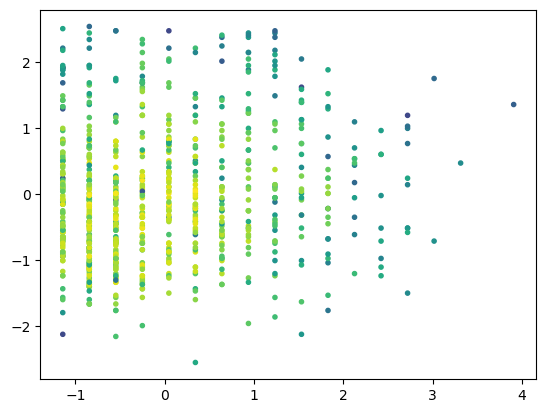

In [8]:
plt.scatter(X_normal[:, 0], X_normal[:, 1], c=iforest.decision_function(X_normal), marker='.')

In [9]:
dfo = pd.DataFrame(dict(predicted_label=iforest.predict(X_normal), score=iforest.decision_function(X_normal)))
outliers = dfo[dfo['predicted_label'] == -1].values
inliers = dfo[dfo['predicted_label'] == 1].head(len(outliers)).values
pd.DataFrame(np.concatenate([inliers, outliers], axis=1), 
             columns=['Inlier Label', 'Inline Score', 'Outlier Label', 'Outline Score'])

,Inlier Label,Inline Score,Outlier Label,Outline Score
0,1.0,0.114258,-1.0,-0.071377
1,1.0,0.145181,-1.0,-0.025126
2,1.0,0.029985,-1.0,-0.012301
3,1.0,0.124734,-1.0,-0.058432
4,1.0,0.153255,-1.0,-0.031986
5,1.0,0.102894,-1.0,-0.011378
6,1.0,0.084039,-1.0,-0.013389
7,1.0,0.016588,-1.0,-0.031324
8,1.0,0.051556,-1.0,-0.033528
9,1.0,0.110516,-1.0,-0.033546


Ultimatly none of these outliers are significant enough to remove, they are each very low

**Dimensionality Reduction: PCA**

In [10]:
pca_normalized = PCA(n_components=2).fit(X_normal)
pca_raw = PCA(n_components=2).fit(X)

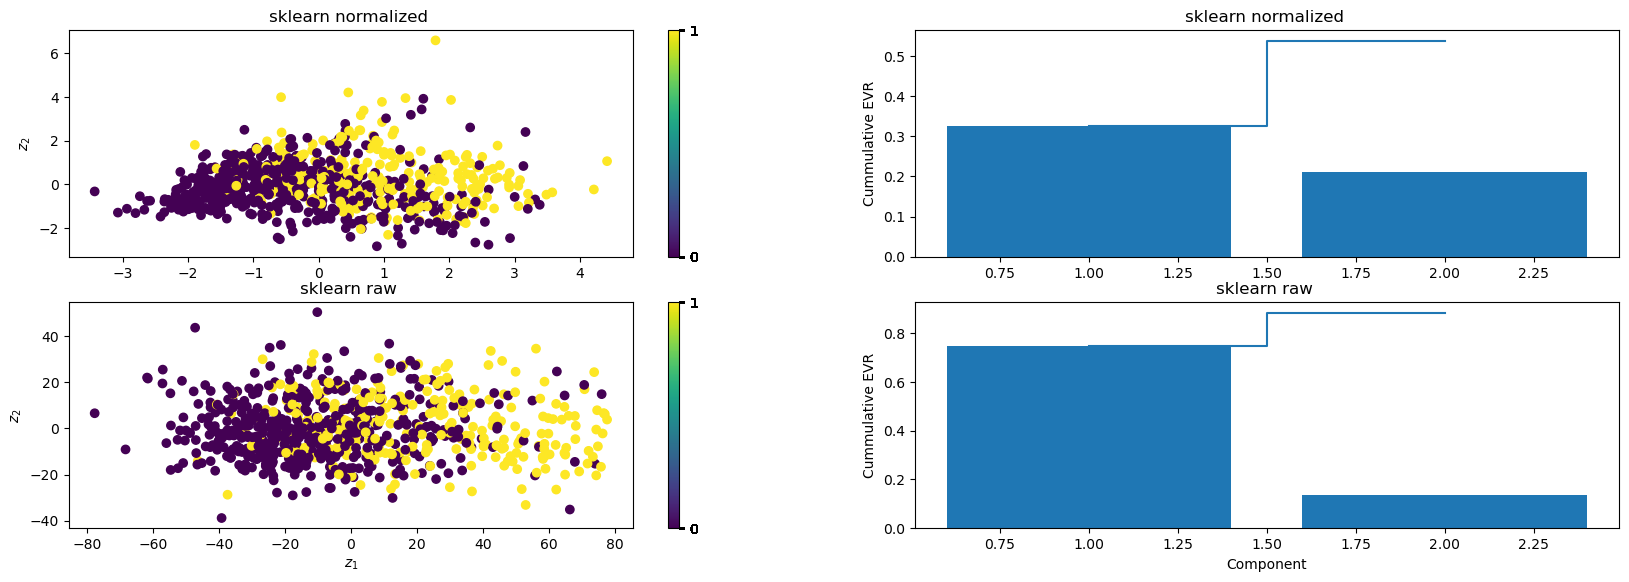

In [11]:
fig = plt.figure(figsize=(20, 10))

for i, pca, title in [(1, pca_normalized, "sklearn normalized "), 
                      (3, pca_raw, "sklearn raw ")]:
    X_projected = pca.transform(X_normal if i < 3 else X)

    plt.subplot(3, 2, i)
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
    cb = plt.colorbar()
    cb.set_ticks(y)
    if i != 1: plt.xlabel('$z_1$')
    plt.ylabel('$z_2$')
    plt.title(title)

    expl_var = pca.explained_variance_ratio_
    cum_expl_var = np.cumsum(expl_var)

    plt.subplot(3, 2, i + 1)
    plt.bar(range(1, len(expl_var) + 1), expl_var, align='center')
    plt.ylabel('EVR')
    if i != 1: plt.xlabel('Component')

    plt.step(range(1, len(cum_expl_var) + 1), cum_expl_var, where='mid')
    plt.ylabel("Cummulative EVR")
    if i != 1: plt.xlabel('Component')
    plt.title(title)

In [12]:
eigen_vals, eigen_vecs = np.linalg.eig(np.cov(X_normal.T))
loadings = eigen_vecs * np.sqrt(eigen_vals)

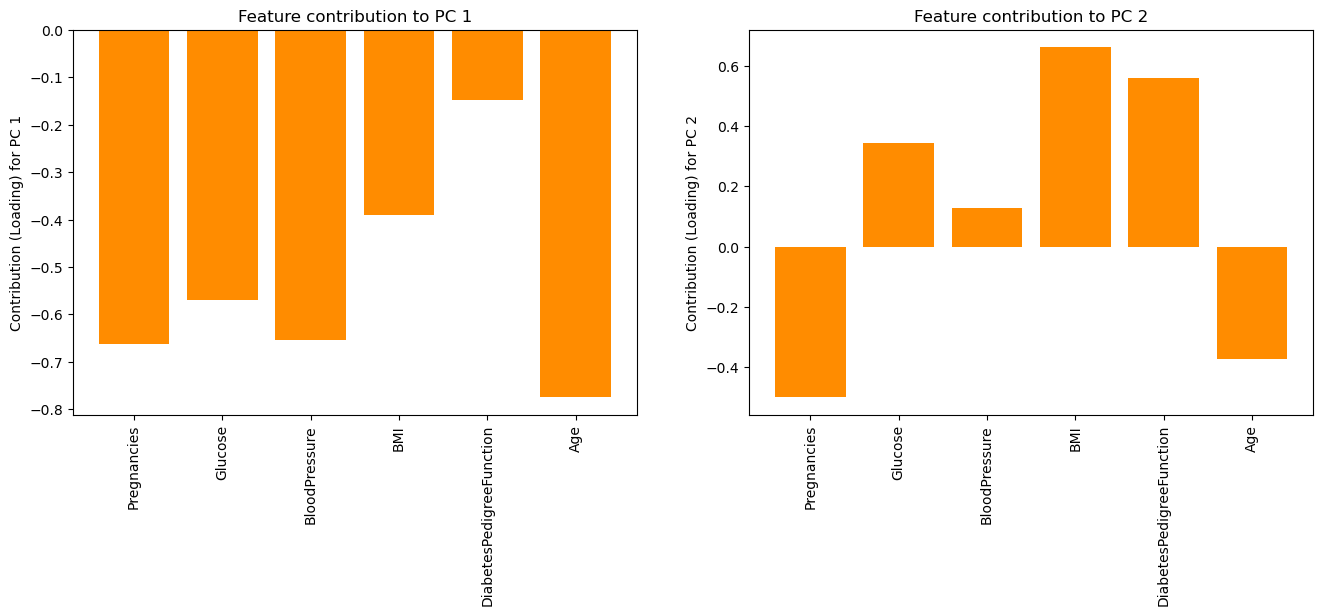

In [13]:
fig = plt.figure(figsize=(16, 5))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.bar(range(X_normal.shape[1]), loadings[:, i], align='center', color="darkorange")
    plt.ylabel(f"Contribution (Loading) for PC {i + 1}")
    plt.xticks(range(6), labels=df.columns[:-1], rotation=90)
    plt.title(f"Feature contribution to PC {i + 1}")

**Additional PCA methods to see if there is a better way**

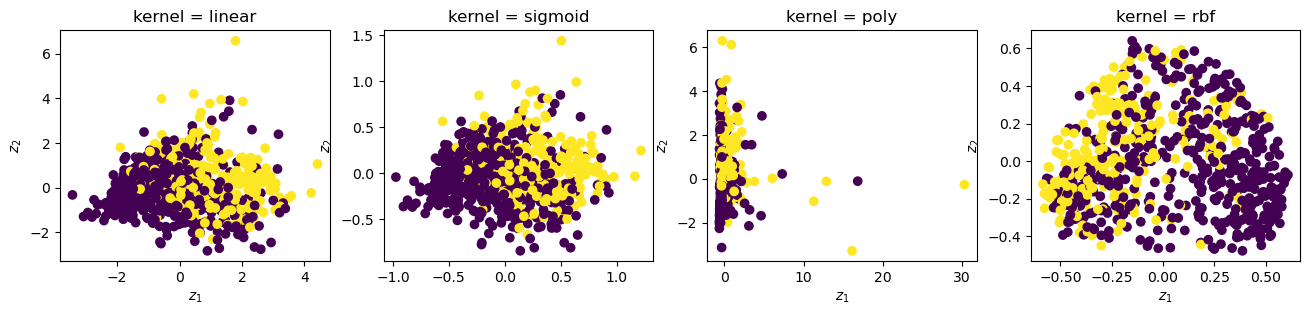

In [14]:
from sklearn.decomposition import KernelPCA
fig = plt.figure(figsize=(16, 3))

for i, k in enumerate(["linear", "sigmoid", "poly", "rbf"]):
    plt.subplot(1,4, i + 1)
    k_pca = KernelPCA(n_components=2, kernel=k)
    X_projected = k_pca.fit_transform(X_normal)
    plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y)
    if i != 1: plt.xlabel('$z_1$')
    plt.ylabel('$z_2$')
    plt.title(f"kernel = {k}")

**KMeans**

In [15]:
from sklearn.cluster import KMeans

X_pca = PCA(n_components=2).fit_transform(X_normal) #Use PCA to reduce the dimensionality of X

K = np.arange(2, 21)
models = [ KMeans(k).fit(X_pca) for k in K ]

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmea

c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmea

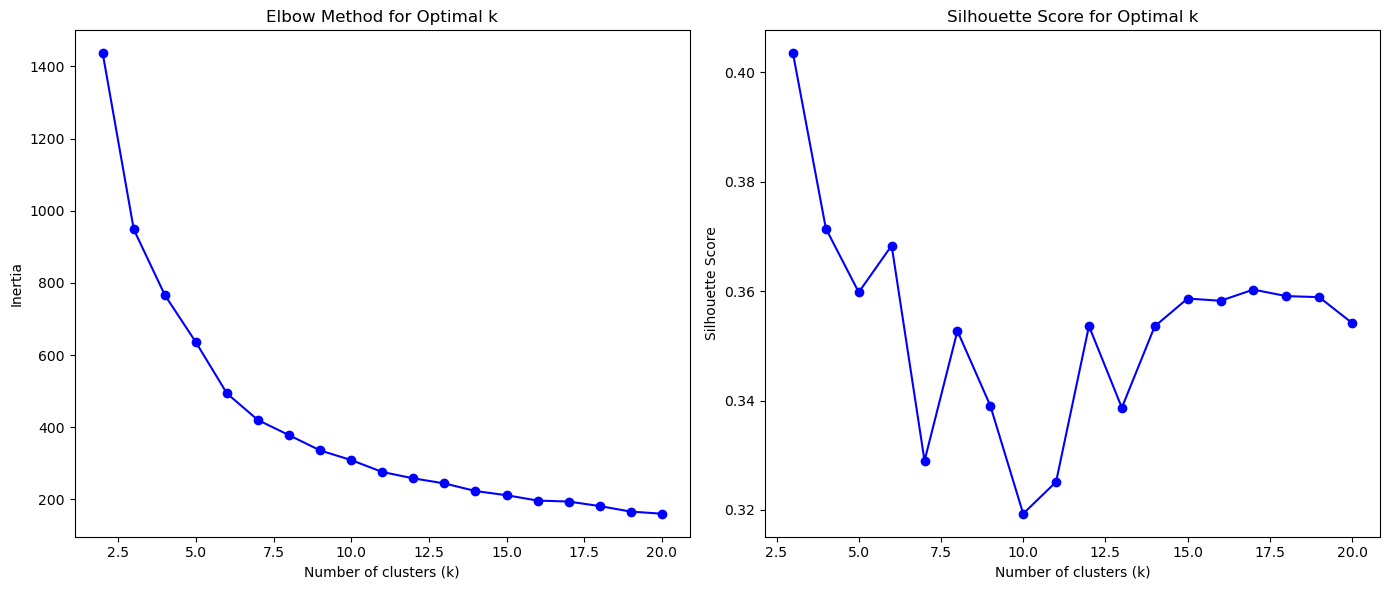

In [16]:
from sklearn.metrics import silhouette_score


# Elbow Method
inertia = [model.inertia_ for model in models]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Silhouette Score
silhouette_scores = []
for k in K[1:]:  # Silhouette score is not defined for k=1
    model = KMeans(n_clusters=k, random_state=0).fit(X_pca)
    labels = model.labels_
    silhouette_scores.append(silhouette_score(X_pca, labels))

plt.subplot(1, 2, 2)
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

In [17]:
##Looks like 3 is my spot

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=3).fit(X_pca)
print(f"Inertia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(X_pca, kmeans.labels_)}")

Inertia: 948.5041464554092
Silhouette Score: 0.40204938395855355


c:\Users\Nathan Losee\anaconda3\envs\torch\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


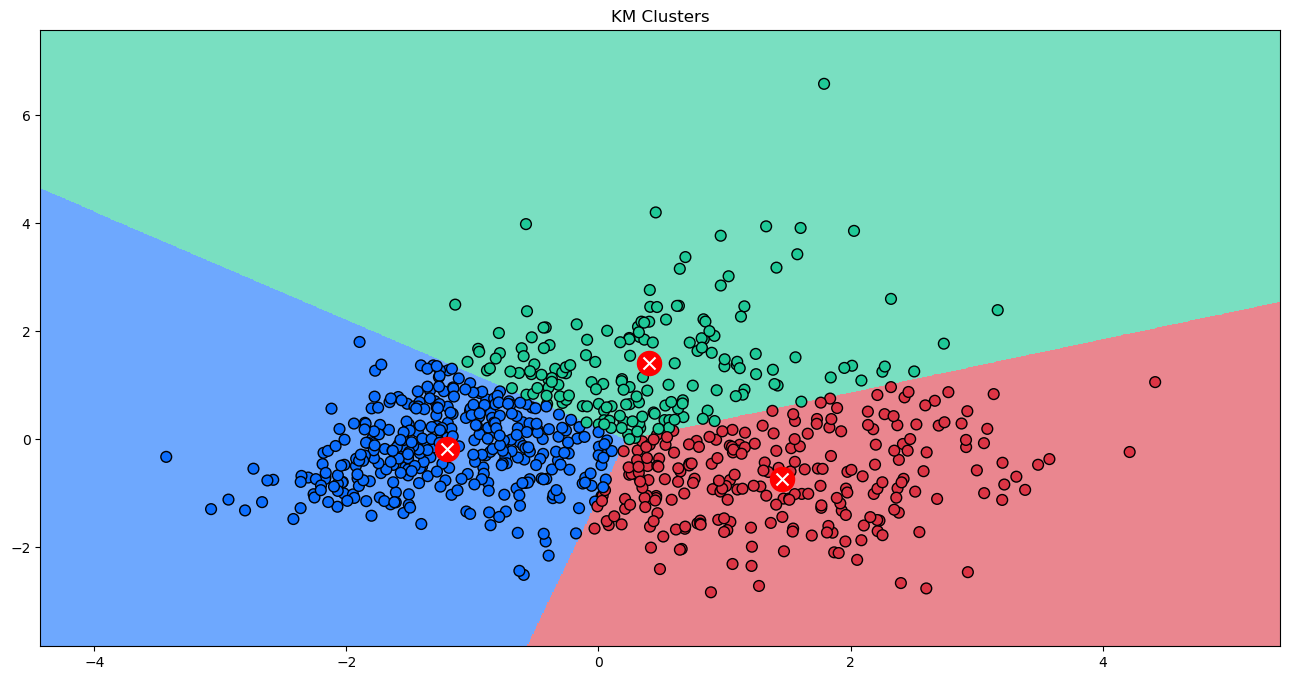

In [18]:
###Plot the KMeans

my.plot_decision_regions(X_pca, kmeans.predict(X_pca).reshape(len(X_pca), 1), kmeans, resolution=0.01, title="KM Clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=300, facecolors='red', edgecolors='r', color='r')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="w", marker="x", s=75)

In [19]:
from sklearn.metrics.cluster import normalized_mutual_info_score

print("KMeans:", normalized_mutual_info_score(y, kmeans.labels_))

KMeans: 0.1033503164320992


In [20]:
#Import required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import mylib as my
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay


Things to do:

Explore the data using descriptive statistics and visualizations to understand the data and explore correlations between its features.

Implement validation techniques like K-fold cross-validation

Logistic Regression, Decision Tree, SVM

Evaluate and report on the results of the best models

Organize steps using pipelines.

## Data Statistics and Visualizations

## Decision Tree

In [21]:
#Split by features and outcome into arrays

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df.iloc[:, -1].values

In [22]:
#Split data into train/test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [23]:
# K-fold Cross Validation; Searching for best CV value

best_cv = 0
best_mean_accuracy = 0

dt = DecisionTreeClassifier(random_state=22) #Import Classifer 

for cv in range(2, 11):  #Different fold numbers
    scores = cross_val_score(dt, X_train, y_train, cv=cv)
    mean_accuracy = scores.mean()
    print(f"CV: {cv}, Mean accuracy: {mean_accuracy}")
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_cv = cv

print(f"Best CV value: {best_cv} with mean accuracy: {best_mean_accuracy}")

CV: 2, Mean accuracy: 0.6807817589576547
CV: 3, Mean accuracy: 0.6986928104575162
CV: 4, Mean accuracy: 0.7150072150072151
CV: 5, Mean accuracy: 0.6839664134346262


CV: 6, Mean accuracy: 0.7182403705818897
CV: 7, Mean accuracy: 0.6890580683684132
CV: 8, Mean accuracy: 0.6938226247436774
CV: 9, Mean accuracy: 0.7003883679075494
CV: 10, Mean accuracy: 0.7019037546271814
Best CV value: 6 with mean accuracy: 0.7182403705818897


In [24]:
#Using Randomized Grid Search to tune hyperparameters

parameters = {
    'max_depth': range(1, 16), 
    'max_features': range(1, 6), 
    'max_leaf_nodes': range(2, 50),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': range(2, 11)
}
dt = DecisionTreeClassifier(random_state=11) #Import Classifer 
gs = RandomizedSearchCV(dt, parameters, cv=best_cv) #Randomized search
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=11),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 16),
                                        'max_features': range(1, 6),
                                        'max_leaf_nodes': range(2, 50),
                                        'min_samples_split': range(2, 11),
                                        'splitter': ['best', 'random']})

In [25]:
gs.best_score_, gs.best_params_

(0.7410368678215623,
 {'splitter': 'random',
  'min_samples_split': 5,
  'max_leaf_nodes': 32,
  'max_features': 3,
  'max_depth': 5,
  'criterion': 'gini'})

Accuracy: 0.7857142857142857


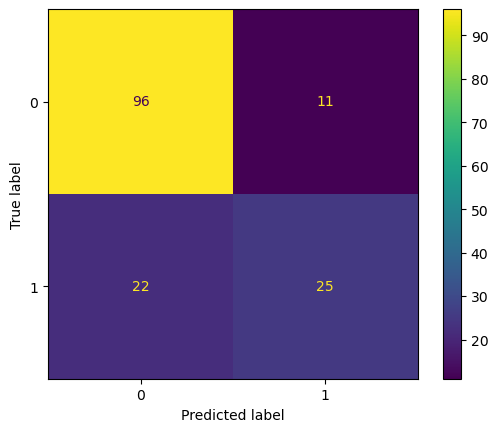

In [26]:
#Training data and plotting confusion matrix

dt = DecisionTreeClassifier(random_state=42, 
                            max_depth=gs.best_params_['max_depth'], 
                            max_features=gs.best_params_['max_features'],
                            max_leaf_nodes=gs.best_params_['max_leaf_nodes'],
                            criterion=gs.best_params_['criterion'],
                            splitter=gs.best_params_['splitter'],
                            min_samples_split=gs.best_params_['min_samples_split']) 
dt.fit(X_train, y_train)
my.plot_confusion_matrix_with_accuracy(dt, X_test, y_test)

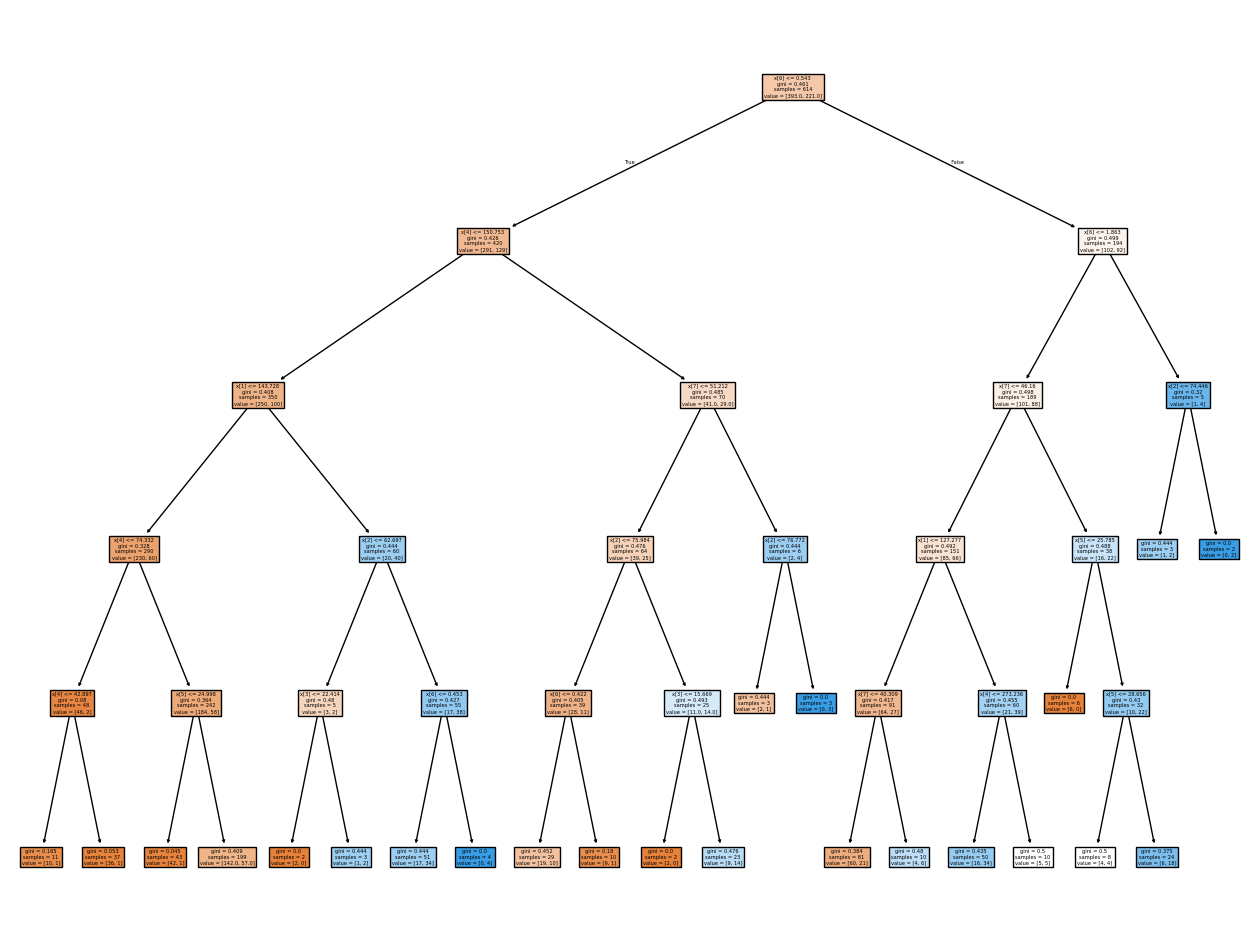

In [27]:
# Plot Decision Tree

fig, ax = plt.subplots(1, 1, figsize=(16,12))
plot_tree(dt, ax=ax, filled=True)
print('')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


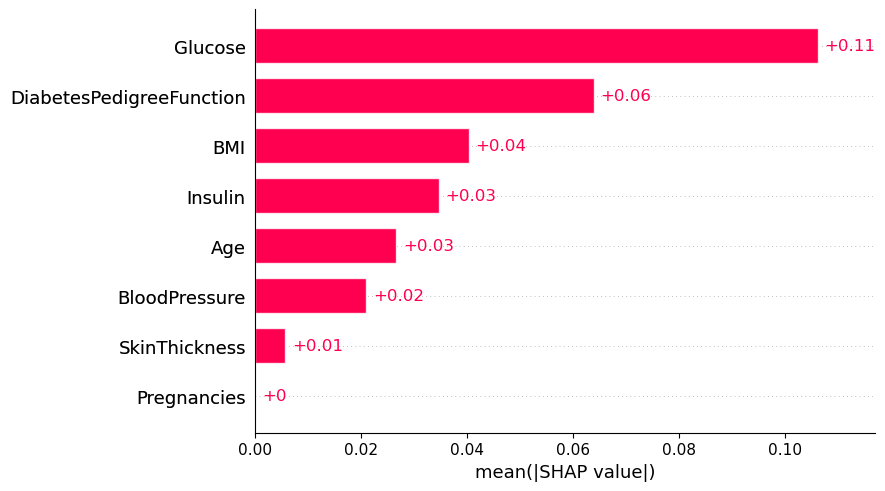

In [28]:
##SHAP
import shap
shap.initjs()
#print(shap.__version__) 0.42.1

feature_names = diabetes_df.columns[:-1]
explainer = shap.TreeExplainer(dt, feature_names=feature_names)
explanations = explainer(X_test)
shap.plots.bar(explanations[:, :, 0])


In [29]:
shap.force_plot(explanations[:,:,0])
# shap.plots.beeswarm(explanations[:,:,0])
# shap.plots.scatter(explanations[:, [7, 1, 6], 0])

## Logistic Regression


In [30]:
#Split by features and outcome into arrays

X, y = diabetes_df.iloc[:, :-1].values, diabetes_df.iloc[:, -1].values

In [31]:
logreg = LogisticRegression()
logreg.get_params() #Showing hyperparameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
best_cv = 0
best_mean_accuracy = 0

logreg = LogisticRegression(random_state=22, max_iter=1000) #Import Classifer 

for cv in range(2, 11):  #Different fold numbers
    scores = cross_val_score(logreg, X_train, y_train, cv=cv)
    mean_accuracy = scores.mean()
    print(f"CV: {cv}, Mean accuracy: {mean_accuracy}")
    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_cv = cv

print(f"Best CV value: {best_cv} with mean accuracy: {best_mean_accuracy}")

CV: 2, Mean accuracy: 0.757328990228013
CV: 3, Mean accuracy: 0.7622748286306393
CV: 4, Mean accuracy: 0.7655547067311772
CV: 5, Mean accuracy: 0.7622817539650807
CV: 6, Mean accuracy: 0.7688305095500984
CV: 7, Mean accuracy: 0.7623525899387967
CV: 8, Mean accuracy: 0.7639055023923444
CV: 9, Mean accuracy: 0.7688500520981338
CV: 10, Mean accuracy: 0.7623215230037017
Best CV value: 9 with mean accuracy: 0.7688500520981338


In [33]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=11))
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(random_state=11))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(random_state=11),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'deprecated',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 11,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [34]:
#Using Randomized Grid Search to tune hyperparameters

parameters = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__max_iter': [100, 200, 500, 1000]
}
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=11))
gs = RandomizedSearchCV(pipeline, parameters, cv=best_cv) #Randomized search
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=9,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression(random_state=11))]),
                   param_distributions={'logisticregression__C': [0.01, 0.1, 1,
                                                                  10, 100],
                                        'logisticregression__max_iter': [100,
                                                                         200,
                                                                         500,
                                                                         1000]})

In [35]:
gs.best_score_, gs.best_params_

(0.7672160651700294,
 {'logisticregression__max_iter': 1000, 'logisticregression__C': 1})

In [36]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

In [37]:
# logreg = pipeline(random_state=42, 
#                             logisticregression__C=gs.best_params_['logisticregression__C'], 
#                             logisticregression__max_iter=gs.best_params_['logisticregression__max_iter']) 
# logreg.fit(X_train, y_train)

In [38]:
# ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [39]:
#Break: Keep stuff below?

In [40]:
#Make pipeline for scaling and classifier

pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression(random_state=42, max_iter=1000))

In [41]:
#Split data into train/test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        91
           1       0.83      0.62      0.71        63

    accuracy                           0.79       154
   macro avg       0.80      0.77      0.77       154
weighted avg       0.80      0.79      0.79       154

Confusion Matrix:


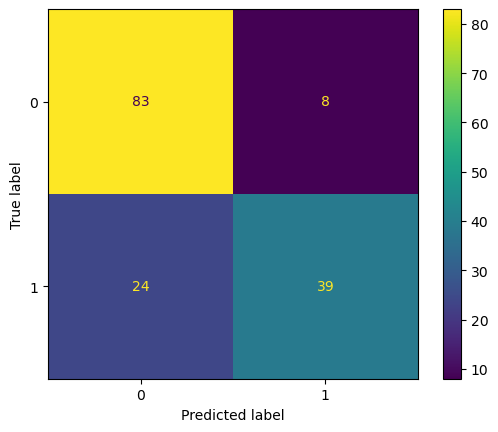

In [43]:
y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)


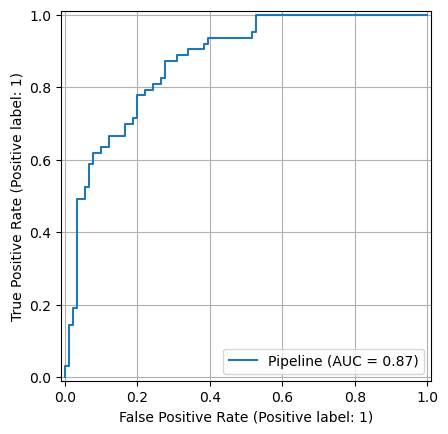

In [44]:
#ROC plot and AUC score to measure performance

RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.grid()

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


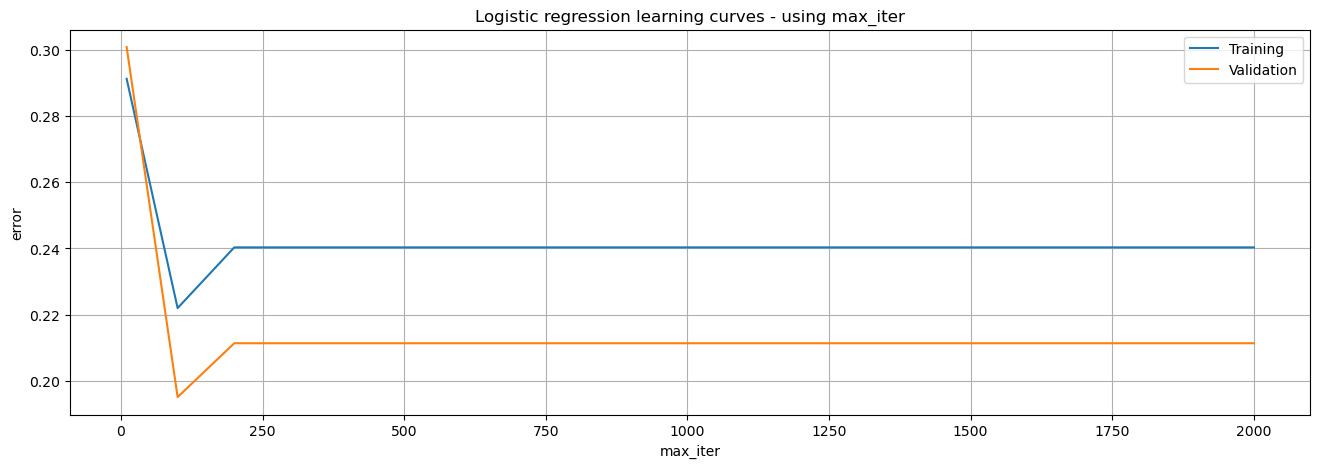

In [45]:
epochs = [10, 100, 200, 300, 400, 500, 700, 900, 1000, 2000]
train_err = []
valid_err = []

# Split the training data further into training and validation sets
X_train_inner, X_valid, y_train_inner, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

for n in epochs:
    logr = LogisticRegression(max_iter=n, random_state=42).fit(X_train_inner, y_train_inner)
    
    cm = my.confusion_matrix(y_train_inner, logr.predict(X_train_inner))
    train_err.append(1 - np.trace(cm) / np.sum(cm))

    cm = my.confusion_matrix(y_valid, logr.predict(X_valid))
    valid_err.append(1 - np.trace(cm) / np.sum(cm))
 
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(epochs, train_err, label="Training")
ax.plot(epochs, valid_err, label="Validation")
ax.set_xlabel("max_iter")
ax.set_ylabel("error")
ax.legend()
ax.grid()
ax.set_title("Logistic regression learning curves - using max_iter")
plt.show()

In [47]:
# Create a SHAP explainer
explainer = shap.Explainer(pipeline.named_steps['logisticregression'], pipeline.named_steps['standardscaler'].transform(X_train))

# Calculate SHAP values for the test data
shap_values = explainer(pipeline.named_steps['standardscaler'].transform(X_test))

# Plot SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

# Summary plot of SHAP values for all predictions
shap.summary_plot(shap_values, X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [46]:
# #Determine good number of epochs

# epochs = [10, 100, 200, 300, 400, 500, 700, 900, 1000, 2000, 3000, 4000, 5000]
# train_err = []
# valid_err = []
# for n in epochs:
#     logr = LogisticRegression(epochs=n).fit(X_train, y_train)
    
#     cm = my.confusion_matrix(y_train, logr.predict(X_train))
#     train_err.append(1 - np.trace(cm) / np.sum(cm))

#     cm = my.confusion_matrix(y_valid, logr.predict(X_valid))
#     valid_err.append(1 - np.trace(cm) / np.sum(cm))
 
# fig = plt.figure(figsize=(16,5))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(epochs, train_err, label="Training")
# ax.plot(epochs, valid_err, label="Validation")
# ax.set_xlabel("epochs")
# ax.set_ylabel("error")
# ax.legend()
# ax.grid()
# ax.set_title("Logistic regression learning curves - using epochs")

## Support Vector Machine (SVM)